In [10]:
from sklearn import linear_model, datasets
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
def shuffle_in_unison(a, b):
    assert len(a) == len(b)
    shuffled_a = np.empty(a.shape, dtype=a.dtype)
    shuffled_b = np.empty(b.shape, dtype=b.dtype)
    permutation = np.random.permutation(len(a))
    for old_index, new_index in enumerate(permutation):
        shuffled_a[new_index] = a[old_index]
        shuffled_b[new_index] = b[old_index]
    return shuffled_a, shuffled_b

([], <a list of 0 Text yticklabel objects>)

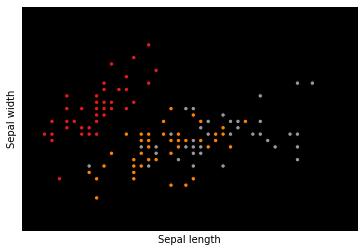

In [130]:
# Load data
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target
X, Y = shuffle_in_unison(X, Y)
Y = Y.T

# Plot data
plt.subplot('111', axisbg='black')
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xticks(())
plt.yticks(())

In [132]:
# Hyperparameters
learning_rate = 0.01
num_of_epochs = 50
reg_lambda = 0.01

# Other parameters
display_step = 1

# Prepare example placeholders
x = tf.placeholder(tf.float32, shape=[None, 2])  # examples have dim 2
y = tf.placeholder(tf.int32) 

# Prepare parameter variables
W = tf.Variable(tf.zeros([2, 3]))

# Define logistic regression
linreg = tf.matmul(x, W)
p_y_x = tf.nn.softmax(linreg)
y_pred = tf.argmax(p_y_x, 1)

# Define cross entropy loss
# loss = tf.nn.softmax_cross_entropy_with_logits(logits=linreg, labels=Y)
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=linreg, labels=y))

# Define optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

# Define variable initializer
init = tf.global_variables_initializer()

# Train
with tf.Session() as s:
    s.run(init)  # initialize variables
    
    avg_loss = 0
    
    for epoch in range(num_of_epochs):
        for xi, yi in zip(X,Y):   # loop over training set
            _, cur_loss = s.run([optimizer, loss], feed_dict={x:xi.reshape(1, len(xi)), y:[yi]})  # take SGD step
        
            avg_loss = cur_loss / len(Y)
            
        if epoch % display_step == 0:
            print('Epoch: {}\tLoss: {:.15f}'.format(epoch, avg_loss))
            
    print('Optimization Finished!')
    print(W.eval())
    
    # Test model
    correct_prediction = s.run([y_pred], feed_dict={x:np.array([ 6.3,  2.3]).reshape(1, 2)})
    print(correct_prediction)

Epoch: 0	Loss: 0.004240983724594
Epoch: 1	Loss: 0.003602890570958
Epoch: 2	Loss: 0.003178722461065
Epoch: 3	Loss: 0.002895374298096
Epoch: 4	Loss: 0.002703191836675
Epoch: 5	Loss: 0.002570435007413
Epoch: 6	Loss: 0.002477119167646
Epoch: 7	Loss: 0.002410564422607
Epoch: 8	Loss: 0.002362589438756
Epoch: 9	Loss: 0.002327798803647
Epoch: 10	Loss: 0.002302555441856
Epoch: 11	Loss: 0.002284358342489
Epoch: 12	Loss: 0.002271447777748
Epoch: 13	Loss: 0.002262562910716
Epoch: 14	Loss: 0.002256781458855
Epoch: 15	Loss: 0.002253423333168
Epoch: 16	Loss: 0.002251975735029
Epoch: 17	Loss: 0.002252048850060
Epoch: 18	Loss: 0.002253341277440
Epoch: 19	Loss: 0.002255618770917
Epoch: 20	Loss: 0.002258692582448
Epoch: 21	Loss: 0.002262414495150
Epoch: 22	Loss: 0.002266665697098
Epoch: 23	Loss: 0.002271355787913
Epoch: 24	Loss: 0.002276399334272
Epoch: 25	Loss: 0.002281730969747
Epoch: 26	Loss: 0.002287298043569
Epoch: 27	Loss: 0.002293060024579
Epoch: 28	Loss: 0.002298971017202
Epoch: 29	Loss: 0.002305

In [131]:
X, Y

(array([[ 5.4,  3.4],
        [ 5. ,  3.5],
        [ 5. ,  3.4],
        [ 6.3,  2.3],
        [ 6.9,  3.1],
        [ 4.6,  3.2],
        [ 7. ,  3.2],
        [ 5.8,  2.7],
        [ 5. ,  2.3],
        [ 5.8,  2.7],
        [ 5.6,  2.5],
        [ 6.5,  3. ],
        [ 4.4,  3. ],
        [ 5.3,  3.7],
        [ 5.9,  3. ],
        [ 6.7,  3.1],
        [ 5. ,  3.5],
        [ 7.2,  3. ],
        [ 4.3,  3. ],
        [ 6.8,  3.2],
        [ 5.5,  2.4],
        [ 6.1,  3. ],
        [ 6.5,  3. ],
        [ 6.1,  2.6],
        [ 7.9,  3.8],
        [ 4.6,  3.4],
        [ 4.9,  2.5],
        [ 6.2,  2.2],
        [ 5.7,  4.4],
        [ 7.7,  3.8],
        [ 7.7,  2.6],
        [ 5.8,  2.7],
        [ 5.8,  2.7],
        [ 5.6,  2.9],
        [ 6.3,  3.4],
        [ 4.7,  3.2],
        [ 5.7,  2.8],
        [ 6.7,  3. ],
        [ 5.1,  3.8],
        [ 6.9,  3.1],
        [ 5.1,  3.5],
        [ 5.6,  3. ],
        [ 6.4,  2.8],
        [ 7.2,  3.6],
        [ 6.4,  2.7],
        [ 